In [264]:
# Stylinos Topalidis
# AEM: 9613
# email: styltopa@ece.auth.gr 

In [265]:
import numpy as np
from numpy.linalg import inv as inv, det as det
import matplotlib.pyplot as plt
from math import sqrt as sqrt, pi, exp as exp
import sys

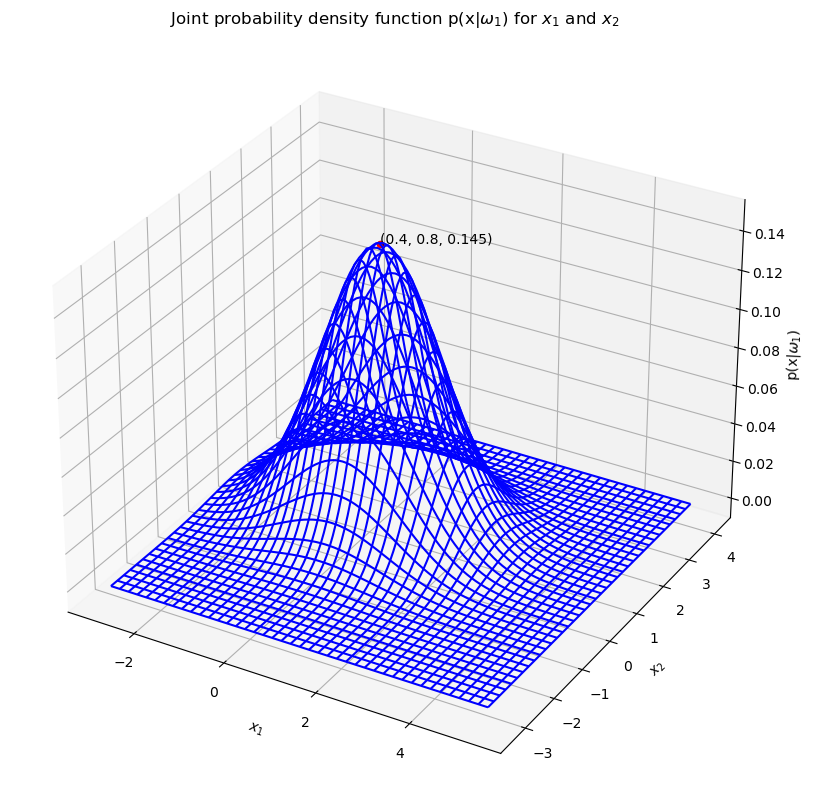

Text(0.5, 1.0, 'View from above')

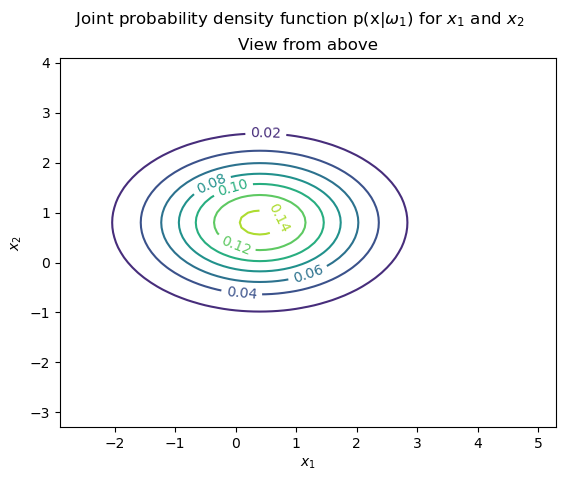

In [266]:
# Small note regarding the execution of the jupyter cells:
# For both parts of the project (A and B) some of the variables used
# require the execution of preceeding cells so make sure you run the cells
# sequentially.


# Part A

# A.1 Conditional probability density functions

# Covariance matrix 
covMat = np.array([[1.5, 0], [0, 0.8]])

# extracting the standard deviations of each blood substance x1 and x2
sigmaX1 = sqrt(covMat[0][0])
sigmaX2 = sqrt(covMat[1][1])

# mean values for the classes of people without risk of cancer (omega1) 
# and possible cancer patients (omega2)   
mu1 = np.array([0.4, 0.8])
mu2 = np.array([1.5, 2.7])


# The bounds up until which the 3d surfaces will be plotted are 
# for values of x1 and x2, 3*sigma1 before and after the mean value  
# The number of standard deviations around mean to plot the graphs 
# is set to 3 as most of the probability is concentrated in the interval 
# [mu - 3*sigma, mu + 3*sigma]

# For simplicity of caclculations, the bounds are rounded to the first
# (1st) decimal.  

stdsArMean = 3
lowBound1 = round(min(mu1[0] - stdsArMean*sigmaX1, mu2[0] - stdsArMean*sigmaX2), 1)
highBound1 = round(max(mu1[0] + stdsArMean*sigmaX1, mu2[0] + stdsArMean*sigmaX2), 1)

lowBound2 = round(min(mu1[1] - stdsArMean*sigmaX1, mu2[1] - stdsArMean*sigmaX2), 1)
highBound2 = round(max(mu1[1] + stdsArMean*sigmaX1, mu2[1] + stdsArMean*sigmaX2), 1)


mu1.shape = (2,1)
# the probablility density function is calculated on the grid (x1, x2) from (lowBound1, lowBound2) 
# up to (highBound1, highBound2) with increments of step = 0.1
step = 0.1

# the various values of the two substances x1, x2
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)
X1, X2 = np.meshgrid(x1, x2)


# p(x|omega1)

# conditional probability density function p(x|omega1)
pCondOmega1 = np.empty((x2.size, x1.size))

# the dimension of the covariance matrix (used in the multivariate normal distribution formula)
l = covMat.shape[0]

# Calculation of p(x|omega1)
for i in range(x1.size):
    for j in range(x2.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        # the 2d point x = (x1, x2) on which the p(x|omega1) is calculated
        point2d = np.array([[x2[j]], [x1[i]]])
        pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(point2d-mu1), inv(covMat)), point2d-mu1))


# Plot the p(x|omega1)
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_1$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')

# I set point2d as the mean of the joined distribution so that I can calculate the p(point2d|omega1)
point2d = np.array(mu1)

# pCondOmegaOnMean is the p(x|omega1) on the mean of the joined distribution for omega1
pCondOmega1OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(point2d-mu1), inv(covMat)), point2d-mu1))


# Plot the mean of the surface
x = point2d[0][0]
y = point2d[1][0]
z = pCondOmega1OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, pCondOmega1)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.suptitle(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')
ax.set_title('View from above')



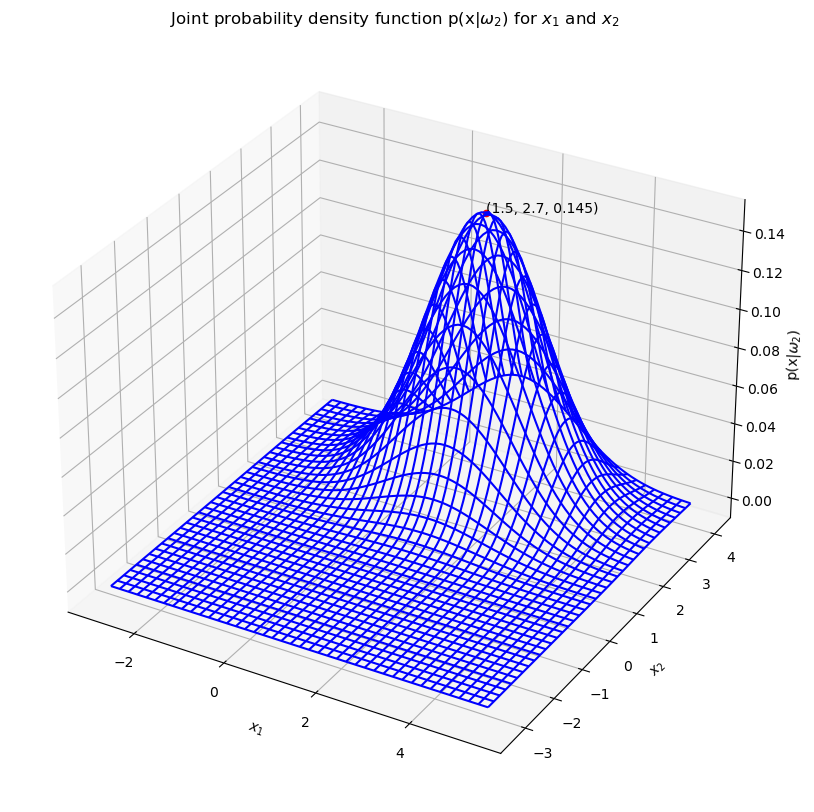

Text(0.5, 0.98, 'Joint probability density function p(x$\\vert\\omega_2$) for $x_1$ and $x_2$')

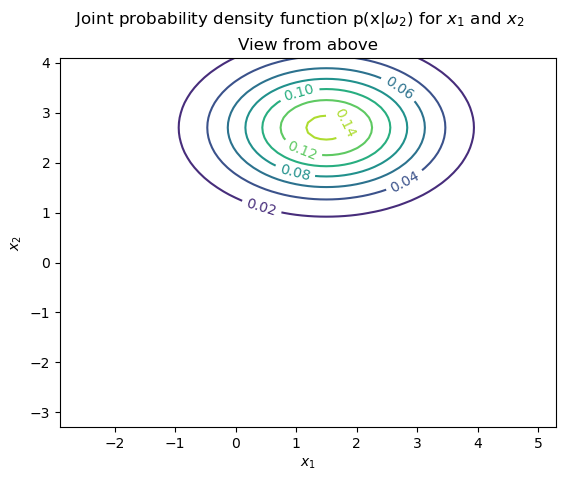

In [267]:

#  p(x|omega2)


mu2.shape = (2,1)
pCondOmega2 = np.empty((x2.size, x1.size))

# Calculation of p(x|omega1)
for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        point2d = np.array([[x2[j]], [x1[i]]])
        pCondOmega2[j][i] = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
            *exp((-1/2)*float(\
            np.matmul(np.matmul(np.transpose(point2d-mu2), inv(covMat)), point2d-mu2)))



# Plot the p(x|omega2)
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

# x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
ax.plot_wireframe(X2, X1, pCondOmega2, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_2$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')
point2d = np.array(mu2)

# pCondOmegaOnMean is the p(x|omega2) on the mean of the joined distribution for omega2
pCondOmega2OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(point2d-mu2), inv(covMat)), point2d-mu2))

# Plot the mean of the surface
x = point2d[0][0]
y = point2d[1][0]
z = pCondOmega2OnMean
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 

ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, pCondOmega2)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')

Text(0.5, 0.98, 'Total probability density function p(x)')

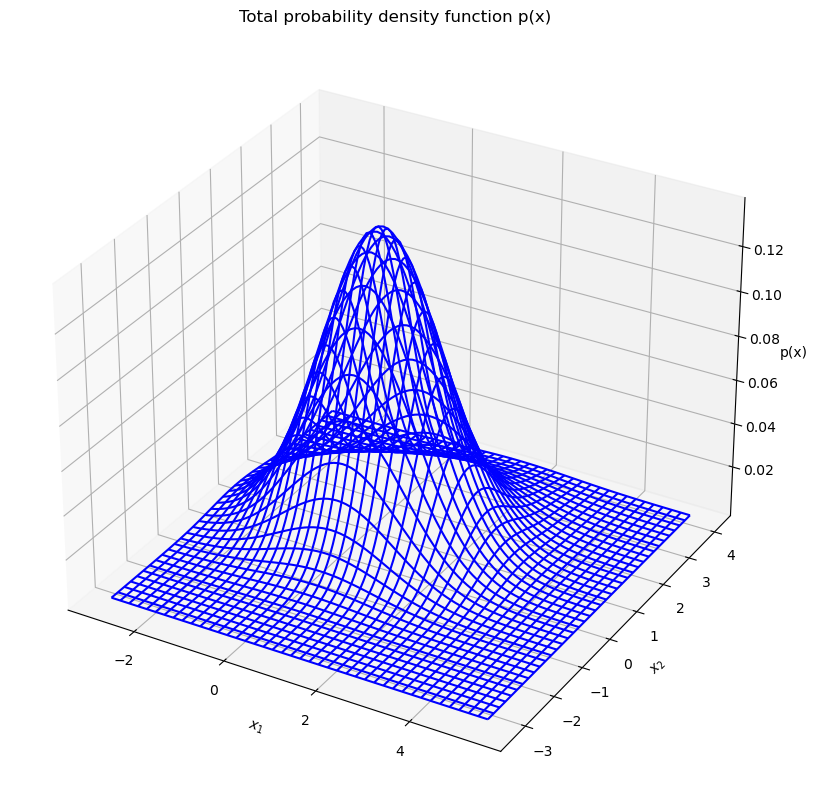

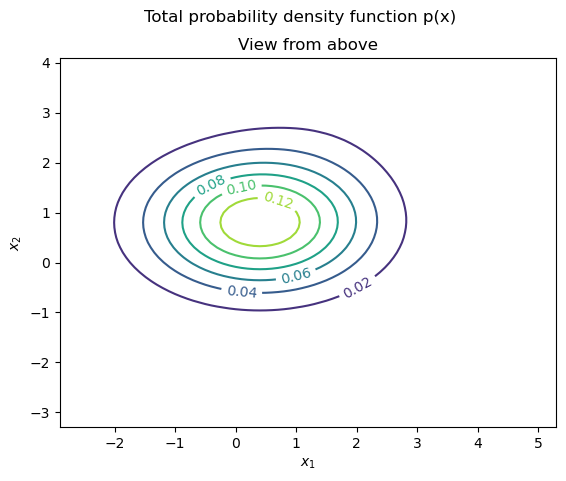

In [268]:

# A.2 Total probability distribution

# p(x) = p(x|omega1)p(omega1) + p(x|omega2)p(omega2)

aPriori1 = 0.95
aPriori2 = 0.05

# the probability density of a patient having particular concentrations
# on the blood substances x1 and x2
totalProbFunc = pCondOmega1*aPriori1 +  pCondOmega2*aPriori2

# Plot the p(x)
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, totalProbFunc, color = 'b')
ax.set_zlabel(r'p(x)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Total probability density function p(x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, totalProbFunc)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle('Total probability density function p(x)')

In [269]:
# The contribution of p(x|omega2) is very small given the a-priori probability value 0.05, and
# cannot be distinguished from p(x|omega1) as a separate bell in the graph.
# Even in the contour plot the small disfigurement of the ellispses on the upper right 
# part of the view from above is barely noticeable  


Text(0.5, 0.98, 'A posteriori probability p($\\omega1$$\\vert$x)')

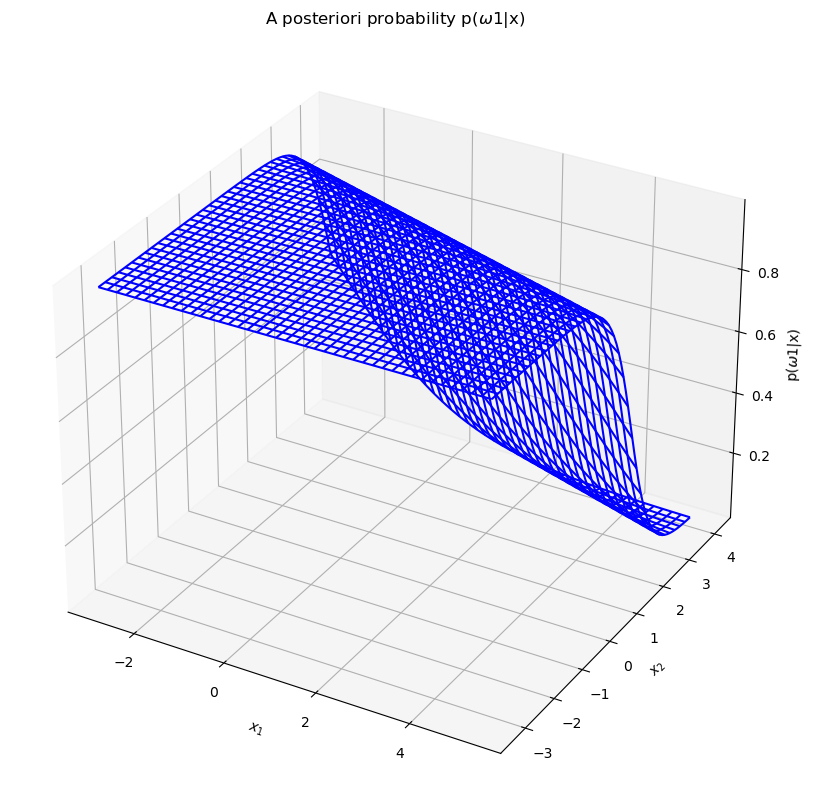

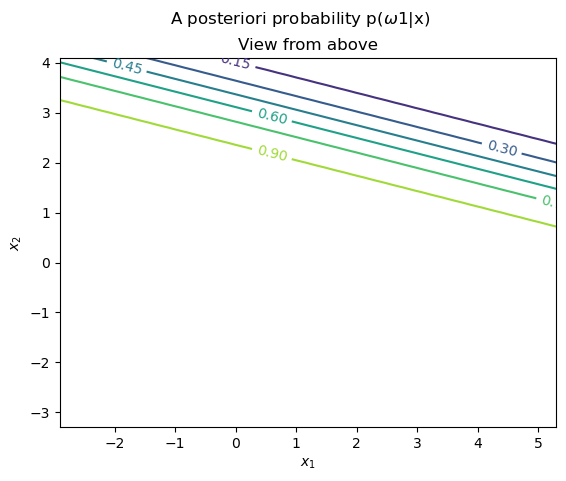

In [270]:
# A.3 A posteriori probabilities (Bayes theorem)


# A posteriori probability for class 1: p(x|omega1)

# Using the Bayes theorem we get: 
aPosteriori1 = np.divide(pCondOmega1*aPriori1,totalProbFunc)

# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, aPosteriori1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega1$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega1$$\vert$x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, aPosteriori1)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'A posteriori probability p($\omega1$$\vert$x)')

Text(0.5, 0.98, 'A posteriori probability p($\\omega2$$\\vert$x)')

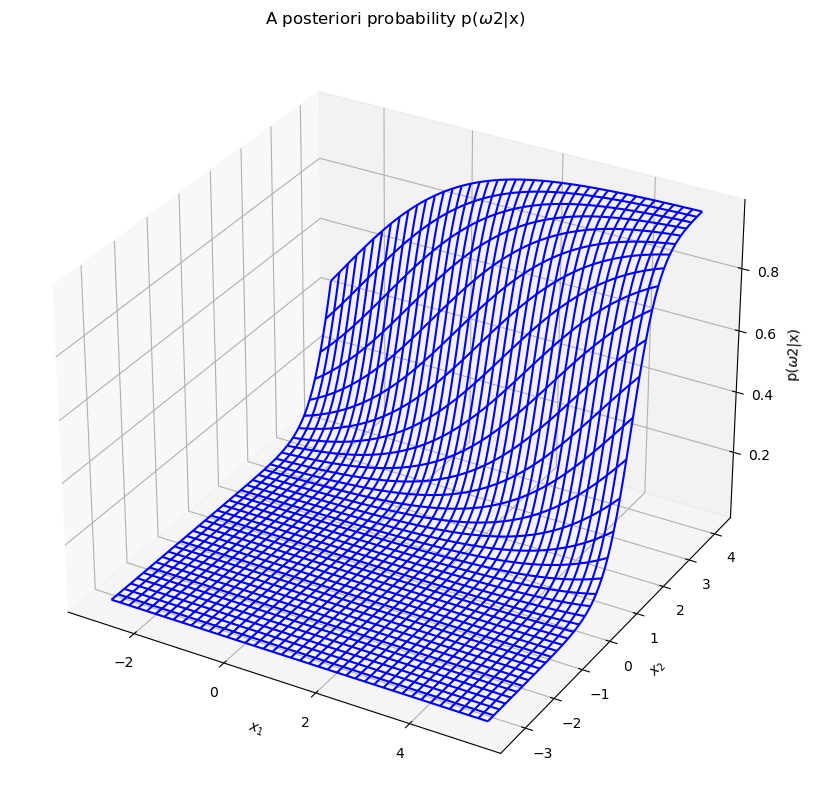

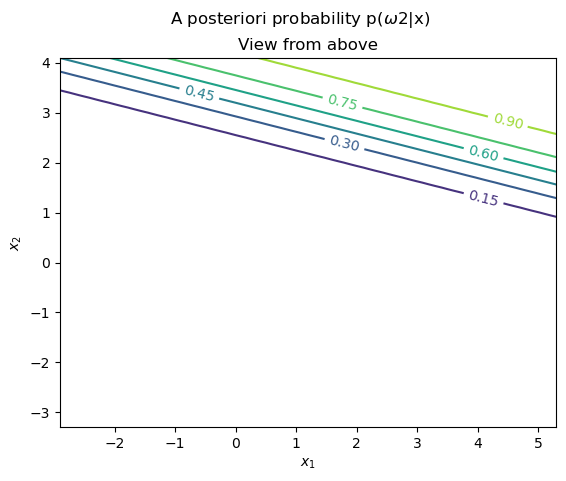

In [271]:
# A posteriori probability for class 2: p(x|omega2)
# Using the Bayes theorem I get: 

aPosteriori2 = pCondOmega2*aPriori2/totalProbFunc

# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, aPosteriori2, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega2$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega2$$\vert$x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, aPosteriori2)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'A posteriori probability p($\omega2$$\vert$x)')

In [272]:
# As expected the values of the a-posteriori curves are complementary with 
# respect to 1. 
# In short, both of the contour graphs above show that if (x1, x2) are below
# the seamingly linear lines, the patient is classified as not of risk (belonging to class omega1),
# whereas above the line they are classified as high-risk of cancer (class omega2) 

Text(0.5, 0.98, 'Height of the probability density for the erroneous classification of the patient')

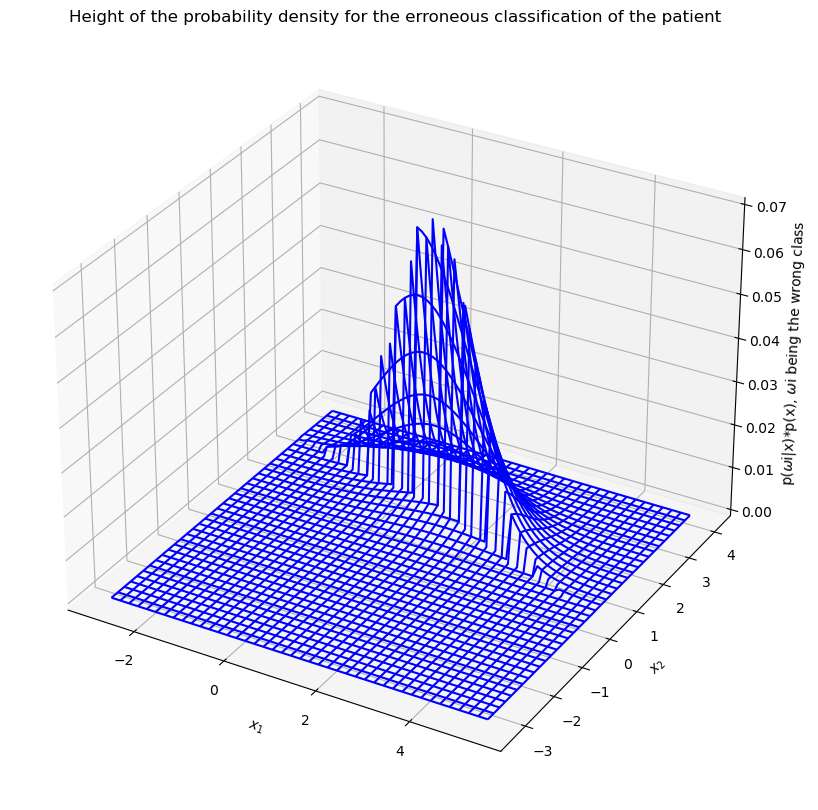

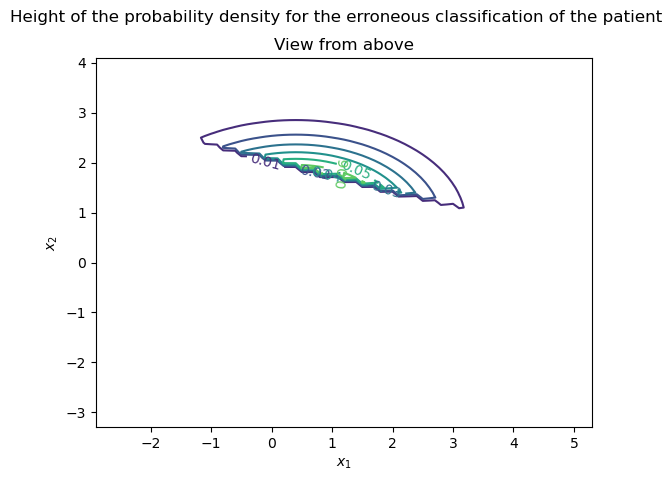

In [274]:

# A.4 Bayes error

# The Bayes error equals the sum of the likelihood pdfs over the grid of x = (x1, x2) 
# Generally, if p(x|omegai) < p(x|omegaj) for all i != j in region Rj:
# P(error) = SUM_for_all_i ( integral_in_region_Rj(p(omegai|x)* p(x) )
# or alternatively (using the Bayes theorem):
# P(error) = SUM_for_all_i ( integral_in_region_Rj(p(x|omegai)* p(omegai) )

# Since there are only two possibilities there are only two likelihood functions.
# minLikelihood: array that holds the values of the smaller likelihood function of the two:
# ( p(x|omega1) if p(x|omega1) < p(x|omega2) and 
#   p(x|omega2) if p(x|omega1) > p(x|omega2) ).
minLikelihood = np.empty_like(pCondOmega1)

# errorHeight: array holding the minLikelihood * aPriori which is the quantity
#  to be integrated to find the error
errorHeight = np.empty_like(pCondOmega1)

# totalError: holds the the accumulated error over the grid (x1, x2)
totalError = 0

# The integration in dicrete space for 2 characteristics (x1, x2) 
# is the sum of volumes below of the 3d surface of the errorHeight

# dx1dx2: the surface of the partitioned area (x1, x2) to calculate the 
# integral on 
dx1dx2 = step**2

# Calculation of the error
for i in range(minLikelihood.shape[0]):
    for j in range(minLikelihood.shape[1]):
        if pCondOmega1[i][j] <= pCondOmega2[i][j]:
            minLikelihood[i][j] = pCondOmega1[i][j]
            errorHeight[i][j] = minLikelihood[i][j]*aPriori1 
            totalError = totalError + errorHeight[i][j]*dx1dx2
        elif pCondOmega1[i][j] > pCondOmega2[i][j]:                
            minLikelihood[i][j] = pCondOmega2[i][j]
            errorHeight[i][j] = minLikelihood[i][j]*aPriori2
            totalError = totalError + errorHeight[i][j]*dx1dx2
        else: 
            sys.exit('There was an error determining the minimum conditional pdf.')


# Plot of the probability density for the erroneous classification
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, errorHeight, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega$i$\vert$x)*p(x), $\omega$i being the wrong class')
ax.set_title('Height of the probability density for the erroneous classification of the patient')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, errorHeight)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle('Height of the probability density for the erroneous classification of the patient')

In [275]:
print('The Bayes error for the classification of the person as \n\
not of risk for cancer or a cancer patient\n\
given the data is %.4f or %.2f%%' %( totalError, totalError*100))

The Bayes error for the classification of the person as 
not of risk for cancer or a cancer patient
given the data is 0.1243 or 12.43%


In [276]:
# The error calculated above across the grid of values of the blood substances (x1, x2) is relatively small. 
# This means that the Bayes model built can act as a quick diagnostic tool before more tests are held
# on whether the person has a risk of cancer.


# It is worth noting that the contour plot above is quite wide which implies that 
# we are not confident to make a diagnosis on a relatively large area on the (x1, x2) grid.

In [277]:
# Part B

# B.1 (Repetition of steps 1-4)

# B.1.1 Conditional probability density functions

# For p(x|omega1), the covariance matrix remains the same, hence the pCondOmega1
# is the same as before. The same goes for the resulting graphs.  
covMat1 = np.array([[1.5, 0], [0, 0.8]])
covMat2 = covMat1/4
# To make all bells more defined
# covMat = np.array([[0.3, 0], [0, 0.2]])

# sigmaX1 = sqrt(covMat1[0][0])
# sigmaX2 = sqrt(covMat1[1][1])

mu1 = np.array([0.4, 0.8])
mu2 = np.array([1.5, 2.7])


# Bounds up until where to plot the surface 
# The two covariance matrices are now different for the two 
# classes.

# max standard deviation between the classes
sigmaMax1 = sqrt(max(covMat1[0][0], covMat2[0][0]))
sigmaMax2 = sqrt(max(covMat1[1][1], covMat2[1][1]) )

stdsArMean = 3
lowBound1 = round(min(mu1[0] - stdsArMean*sigmaMax1, mu2[0] - stdsArMean*sigmaMax2), 1)
highBound1 = round(max(mu1[0] + stdsArMean*sigmaMax1, mu2[0] + stdsArMean*sigmaMax2), 1)

lowBound2 = round(min(mu1[1] - stdsArMean*sigmaMax1, mu2[1] - stdsArMean*sigmaMax2), 1)
highBound2 = round(max(mu1[1] + stdsArMean*sigmaMax1, mu2[1] + stdsArMean*sigmaMax2), 1)

step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)
X1, X2 = np.meshgrid(x1, x2)


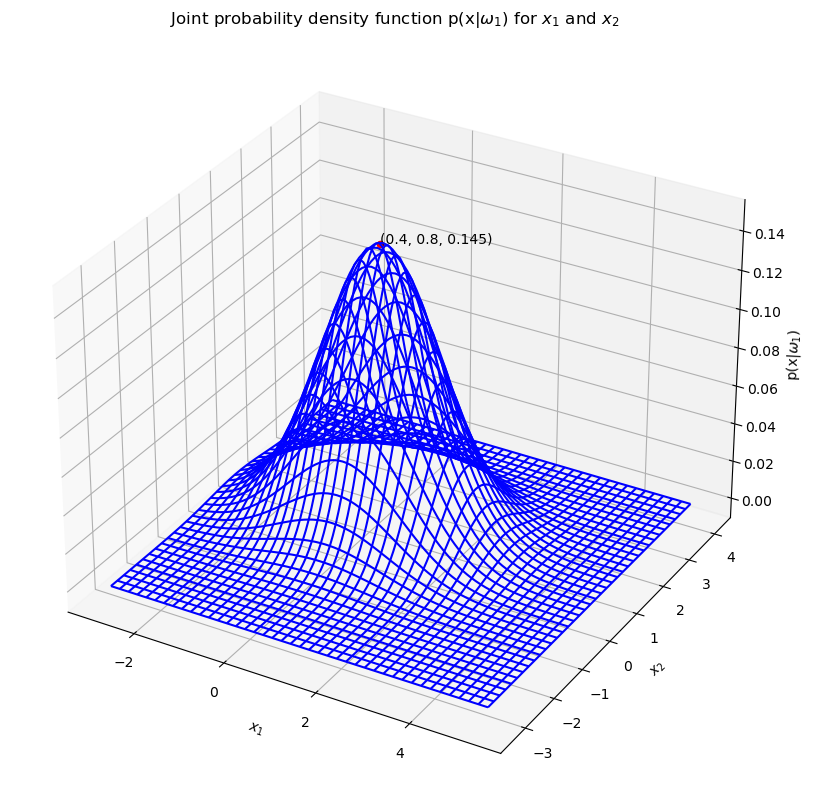

Text(0.5, 0.98, 'Joint probability density function p(x$\\vert\\omega_1$) for $x_1$ and $x_2$')

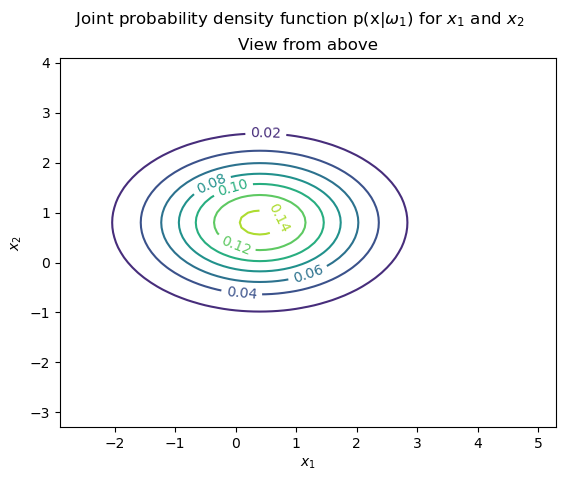

In [278]:

# p(x|omega1)


# For p(x|omega1), the covariance matrix remains the same, hence the pCondOmega1
# is the same as before. The same goes for the resulting graphs.  

mu1.shape = (2,1)
pCondOmega1 = np.empty((x2.size, x1.size))
l = covMat1.shape[0]

# given the formula for multivariate distibution (x is a vector)
for j in range(x2.size):
    for i in range(x1.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        point2d = np.array([[x2[j]], [x1[i]]])
        pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat1))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(point2d-mu1), inv(covMat1)), point2d-mu1)))


# Plot the p(x|omega1)
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_1$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')

# point2d: the mean of the joined distribution
point2d = np.array(mu1)
l = covMat1.shape[0]
# pCondOmegaOnMean is the p(x|w_1) on the mean of the joined distribution
pCondOmega1OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat1))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(point2d-mu1), inv(covMat1)), point2d-mu1)))


# Plot the mean of the surface
x = point2d[0][0]
y = point2d[1][0]
z = pCondOmega1OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, pCondOmega1)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')

Text(0.5, 0.98, 'Joint probability density function p(x$\\vert\\omega_2$) for $x_1$ and $x_2$')

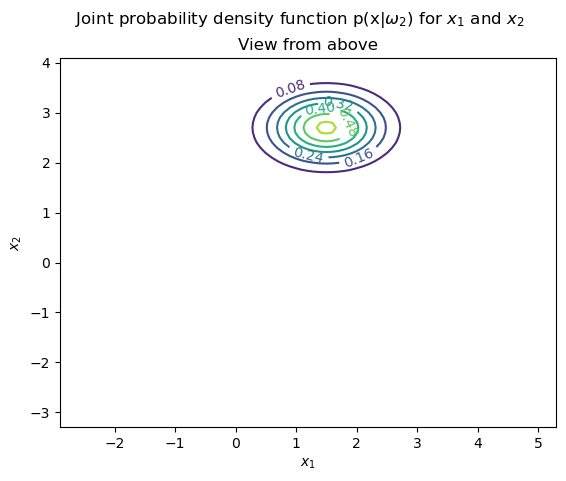

In [279]:
# p(x|omega2)

# For p(x|omega2), the covariance matrix changes, hence the pCondOmega2
# is not the same as before. The same goes for the resulting graphs.  
covMat2 = covMat1/4

mu2.shape = (2,1)
pCondOmega2 = np.empty((x2.size, x1.size))
l = covMat1.shape[0]

# Calculation of the p(x|omega2)
for j in range(x2.size):
    for i in range(x1.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        point2d = np.array([[x2[j]], [x1[i]]])
        pCondOmega2[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat2))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(point2d-mu2), inv(covMat2)), point2d-mu2)))


# Plot of the p(x|omega2) 
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega2, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_2$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')

# point2d now holds the mean of the joined distribution
point2d = np.array(mu2)
l = covMat2.shape[0]

# pCondOmegaOnMean is the p(x|omega1) on the mean of the joined distribution
pCondOmega2OnMean = 1/(((2*pi)**(l/2))*sqrt(det(covMat2)))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(point2d-mu2), inv(covMat2)), point2d-mu2))


# Plot the mean of the surface 
x = point2d[0][0]
y = point2d[1][0]
z = pCondOmega2OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, pCondOmega2)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')

In [280]:
# The bell shape is visibly narrower than the one presented in A.1 for p(x|omega2)
# due to the smaller standard deviation of the concentration of substances x1 and x2
# in the class omega2 (cancer patient)

Text(0.5, 0.98, 'Total probability density function p(x)')

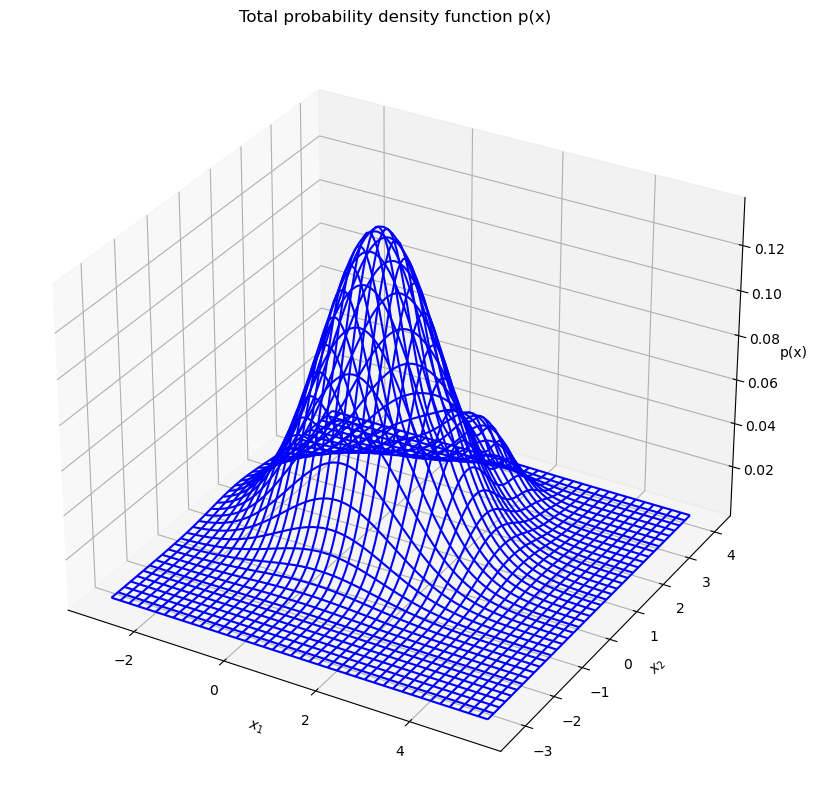

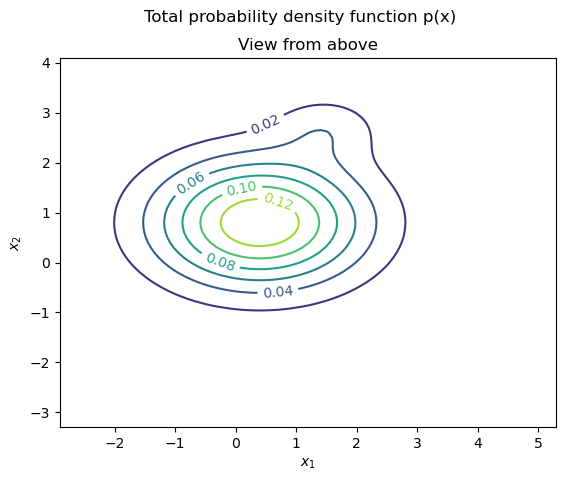

In [281]:
# B.1.2 Total probability distribution

# p(x) = p(x|omega1)p(omega1) + p(x|omega2)p(omega2)
aPriori1 = 0.95
aPriori2 = 0.05
totalProbFunc = pCondOmega1*aPriori1 +  pCondOmega2*aPriori2


# Plot the p(x)
# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, totalProbFunc, color = 'b')
ax.set_zlabel(r'p(x)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Total probability density function p(x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, totalProbFunc)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle('Total probability density function p(x)')

In [282]:
# The contribution of p(x|omega2) is now larger due to the change of the covariance matrix sigma2
# and can now be distinguished from p(x|omega1) as a separate bell in the graph 
# (it is the little bell on the back in the 3d graph and the oval curve on the far right of the ellipses)


Text(0.5, 0.98, 'A posteriori probability p($\\omega1$$\\vert$x)')

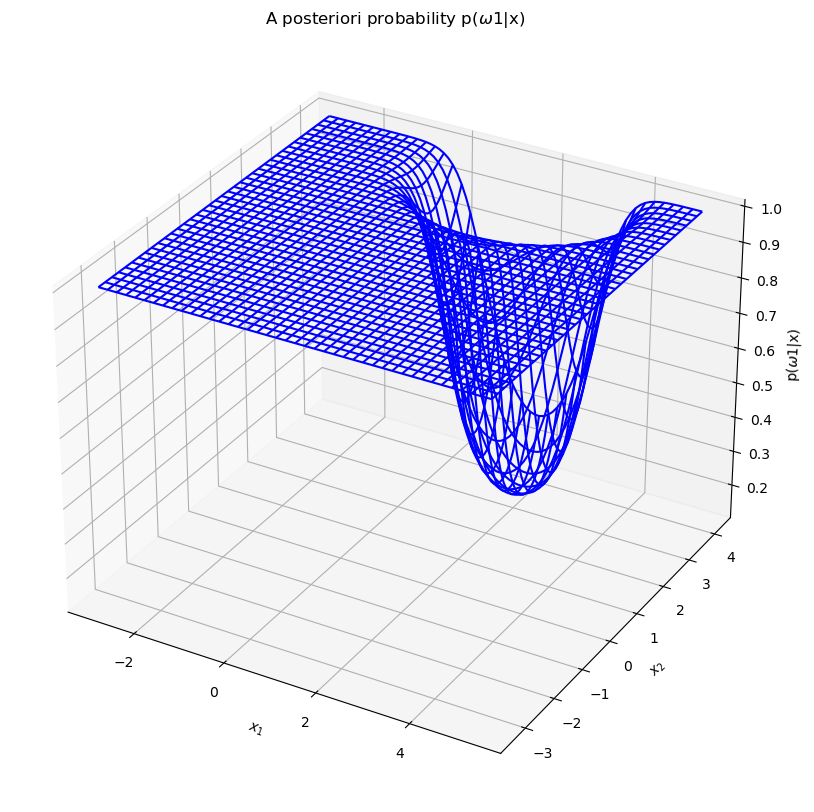

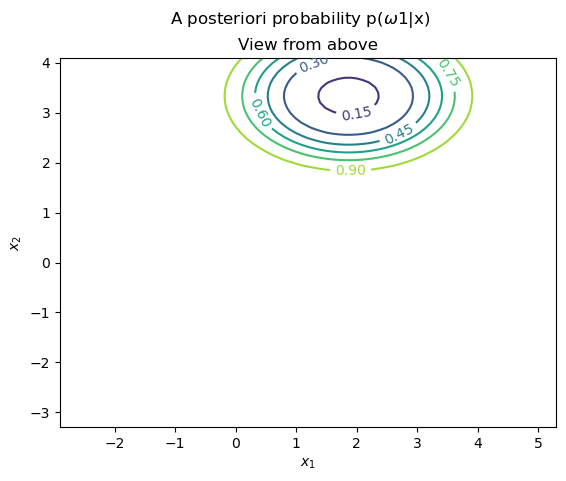

In [283]:
# B.1.3 A posteriori probabilities (Bayes theorem)

# A posteriori probability for class 1 
aPosteriori1 = np.divide(pCondOmega1*aPriori1,totalProbFunc)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, aPosteriori1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega1$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega1$$\vert$x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, aPosteriori1)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'A posteriori probability p($\omega1$$\vert$x)')

Text(0.5, 0.98, 'A posteriori probability p($\\omega2$$\\vert$x)')

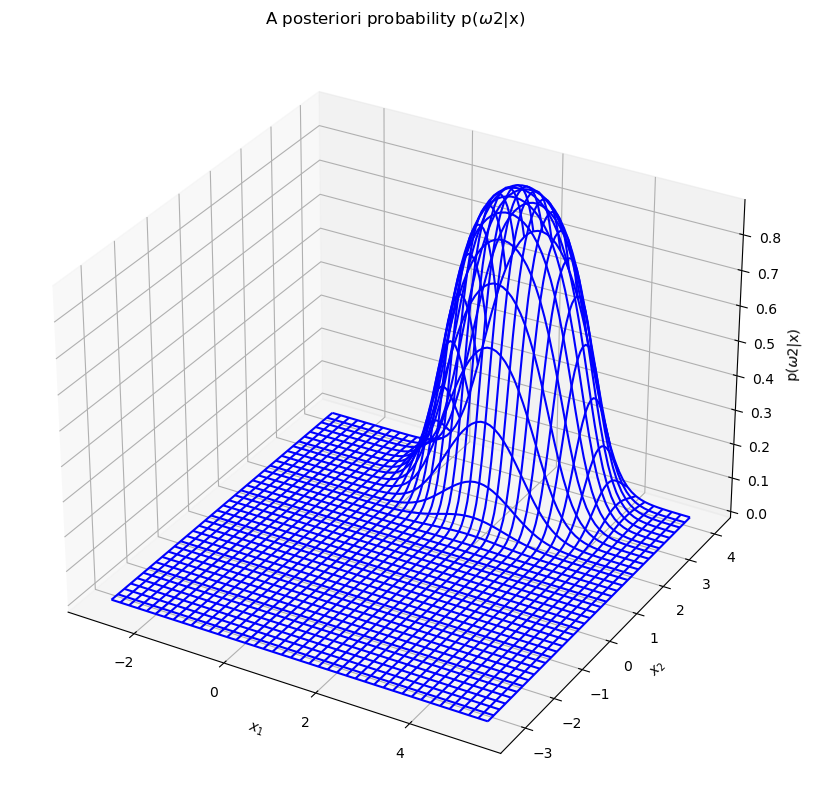

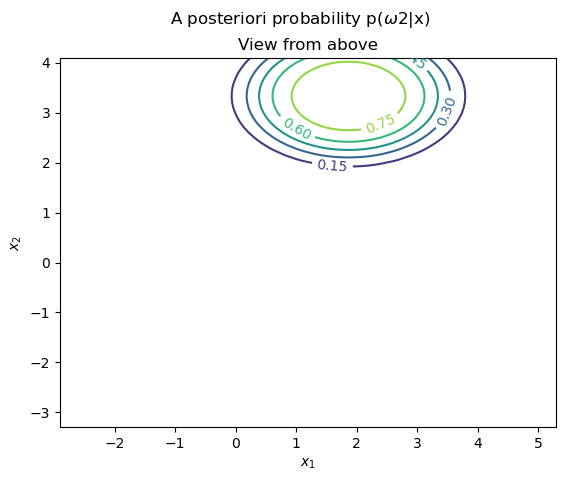

In [284]:
# A posteriori probability for class 2 
aPosteriori2 = pCondOmega2*aPriori2/totalProbFunc

# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, aPosteriori2, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega2$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega2$$\vert$x)')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, aPosteriori2)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle(r'A posteriori probability p($\omega2$$\vert$x)')

In [285]:
# Once again the values of the a-posteriori curves are complementary with 
# respect to 1. 
# In contrast to what we saw before (A.3), the decision lines are now ellipses and not 
# linear lines
# This time, both of the contour graphs above show that if the point (x1, x2) is outside
# the ellipses, the patient is classified as not of risk (belonging to class omega1)
# whereas if (x1, x2) is inside the ellipses they are classified as high-risk of cancer
# (class omega2) 

Text(0.5, 0.98, 'Height of the probability density for the erroneous classification of the patient')

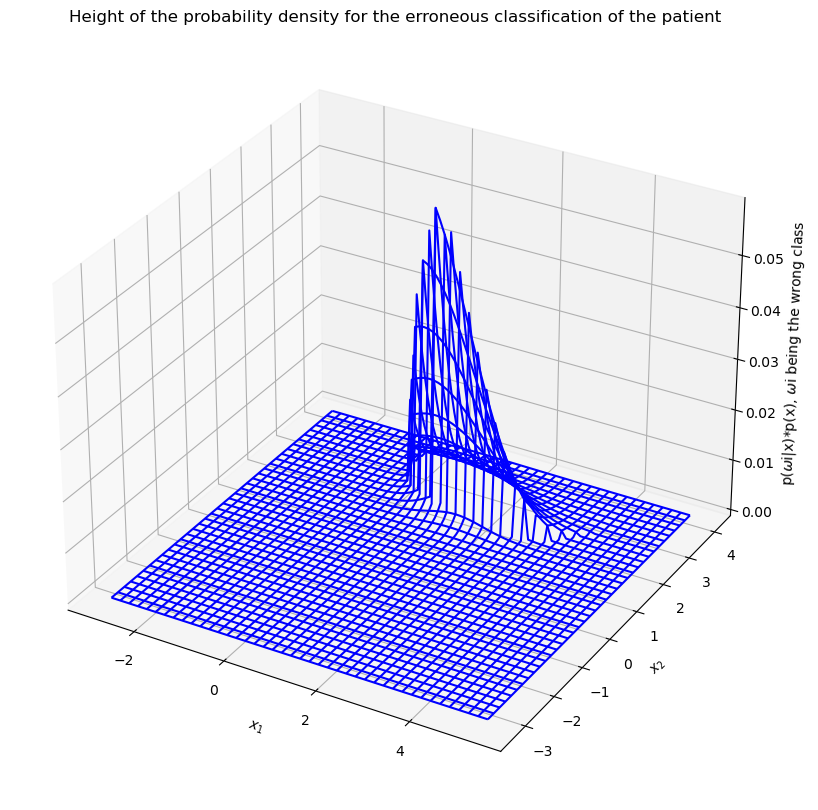

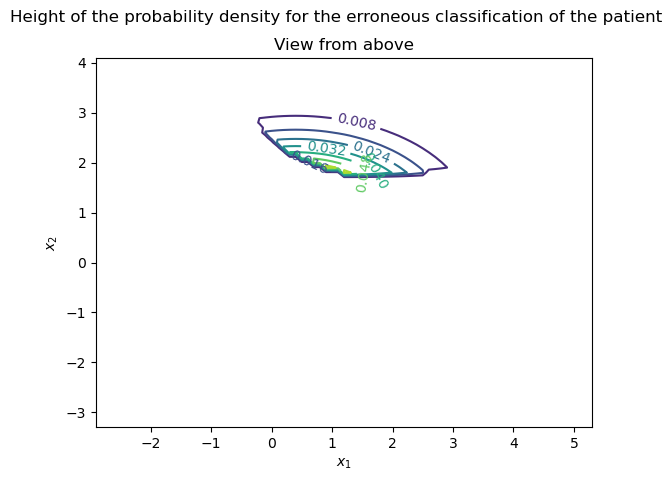

In [287]:
# B.1.4 Bayes error

# It is calculated in the same way as in A.4

minLikelihood = np.empty_like(pCondOmega1)
errorHeight = np.empty_like(pCondOmega1)
totalError = 0
dx1dx2 = step**2

for i in range(minLikelihood.shape[0]):
    for j in range(minLikelihood.shape[1]):
        if pCondOmega1[i][j] <= pCondOmega2[i][j]:
            minLikelihood[i][j] = pCondOmega1[i][j]
            errorHeight[i][j] = minLikelihood[i][j]*aPriori1 
            totalError = totalError + errorHeight[i][j]*dx1dx2
        elif pCondOmega1[i][j] > pCondOmega2[i][j]:                
            minLikelihood[i][j] = pCondOmega2[i][j]
            errorHeight[i][j] = minLikelihood[i][j]*aPriori2
            totalError = totalError + errorHeight[i][j]*dx1dx2
        else: 
            sys.exit('There was an error determining the minimum conditional pdf.')
    

# 3d plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, errorHeight, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega$i$\vert$x)*p(x), $\omega$i being the wrong class')
ax.set_title('Height of the probability density for the erroneous classification of the patient')

# contour plot
fig, ax = plt.subplots()
CS = ax.contour(X2, X1, errorHeight)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('View from above')
plt.suptitle('Height of the probability density for the erroneous classification of the patient')

In [288]:
print('The Bayes error for the classification of the person as \n\
not of risk for cancer or a cancer patient\n\
given the data is %.4f or %.2f%%' %( totalError, totalError*100))

The Bayes error for the classification of the person as 
not of risk for cancer or a cancer patient
given the data is 0.0665 or 6.65%


In [289]:
# B.2 Comments on the Bayes error observed. Comparison with the error calculated in A.4

# The bayes error decreases. This is due to the change of the covariance matrix (sigma2) of the class 2.
# More specifically, the covariance matrix was divided by 4 making it so the included standard deviations
# became smaller. 
# As a result the bell surface for the cancer patients (p(x|omega2) is now narrower meaning the concentrations 
# of x1, x2 in the patients' blood are more concentrated in a narrower area than before. What this shows essentially is that
# if the patients have (x1, x2) around this area, we can be more certain that they are in a risk of cancer (omega2).

# The contour plot above is narrower and has smaller values of the error
# than the plot we derived in A.4. This implies that 
# we are not confident to make a diagnosis only on a much smaller area on the (x1, x2) grid.